In [1]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
import pandas as pd

df = pd.read_csv(
    "twitter_training.csv",
    encoding="latin-1",
    header=None   # IMPORTANT
)

In [4]:
print(df.head())

      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [5]:
print(len(df.columns))

4


In [6]:
import pandas as pd

df = pd.read_csv("twitter_training.csv", header=None)

df.columns = ["id", "entity", "sentiment", "text"]

print(df.head())

     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [7]:
df = df[df["sentiment"].isin(["Positive", "Negative"])]
# Convert to numeric labels
df["sentiment"] = df["sentiment"].replace({
    "Negative": 0,
    "Positive": 1
})

print(df["sentiment"].value_counts())
print(df.head())

sentiment
0    22542
1    20832
Name: count, dtype: int64
     id       entity  sentiment  \
0  2401  Borderlands          1   
1  2401  Borderlands          1   
2  2401  Borderlands          1   
3  2401  Borderlands          1   
4  2401  Borderlands          1   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


/tmp/ipython-input-743441387.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sentiment"] = df["sentiment"].replace({


In [8]:
import re

def clean_text(text):
    text = str(text)  # ensure it's string
    text = text.lower()  # lowercase

    # remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # remove mentions
    text = re.sub(r'@\w+', '', text)

    # remove hashtag symbol (keep word)
    text = re.sub(r'#', '', text)

    # remove numbers
    text = re.sub(r'\d+', '', text)

    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['clean_text'] = df['text'].apply(clean_text)

print(df[['text', 'clean_text']].head())

                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                          clean_text  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you all  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands and i will murder yo...  


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df['clean_text']
y = df['sentiment']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 20% test data
    random_state=42,    # for reproducibility
    stratify=y          # keeps class balance
)

In [12]:
print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)

Training Data: (34699,)
Testing Data: (8675,)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    max_features=5000,     # use top 5000 words
    ngram_range=(1,2),     # unigrams + bigrams
    stop_words='english'   # remove common stopwords
)

In [14]:
# Fit on training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf.transform(X_test)

In [15]:
print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)

Train shape: (34699, 5000)
Test shape: (8675, 5000)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train_tfidf, y_train)

# Predictions for LOGISTIC REGRESSIONS
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.8605187319884726

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      4509
           1       0.88      0.83      0.85      4166

    accuracy                           0.86      8675
   macro avg       0.86      0.86      0.86      8675
weighted avg       0.86      0.86      0.86      8675


Confusion Matrix:
 [[4022  487]
 [ 723 3443]]


In [18]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize SVM model
svm_model = LinearSVC()

# Train
svm_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate
print("===== SVM Results =====")
print("\nAccuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


===== SVM Results =====

Accuracy: 0.8746974063400577

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      4509
           1       0.88      0.85      0.87      4166

    accuracy                           0.87      8675
   macro avg       0.88      0.87      0.87      8675
weighted avg       0.87      0.87      0.87      8675


Confusion Matrix:
 [[4038  471]
 [ 616 3550]]


In [19]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naive Bayes model
nb_model = MultinomialNB()

# Train
nb_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate
print("\n===== Naive Bayes Results =====")
print("\nAccuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))



===== Naive Bayes Results =====

Accuracy: 0.8335446685878962

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      4509
           1       0.84      0.80      0.82      4166

    accuracy                           0.83      8675
   macro avg       0.83      0.83      0.83      8675
weighted avg       0.83      0.83      0.83      8675


Confusion Matrix:
 [[3895  614]
 [ 830 3336]]


In [20]:
print("\nModel Comparison:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))



Model Comparison:
Logistic Regression Accuracy: 0.8605187319884726
SVM Accuracy: 0.8746974063400577
Naive Bayes Accuracy: 0.8335446685878962


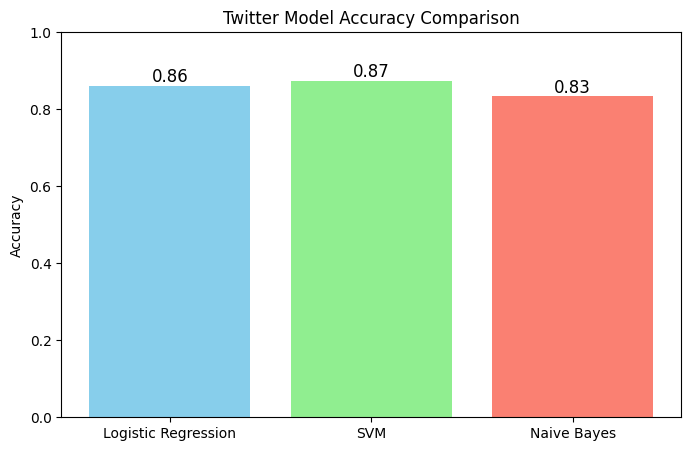

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calculate accuracies
accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb)
}

# Create a bar chart
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen', 'salmon'])

# Add value labels on top of bars
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)

plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Twitter Model Accuracy Comparison")
plt.show()
